In [1]:
# 주성분을 사용해 특성 줄이기
# 사이킷런 손글씨 데이터를 활용하여 특성 행렬을 표준화 처리 및 주성분 특성 줄이기
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

원본 특성 개수 :  64
줄어든 특성 개수 :  54


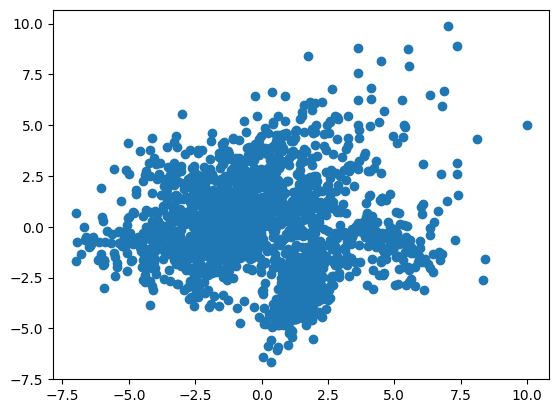

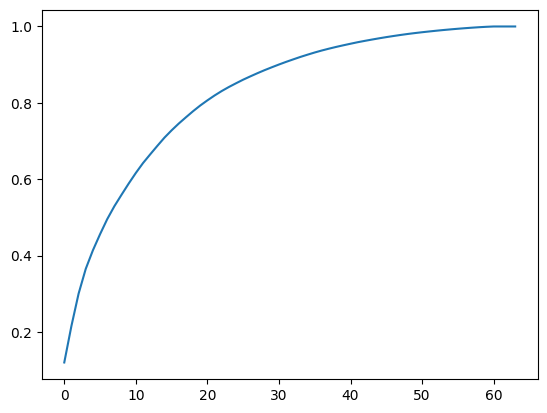

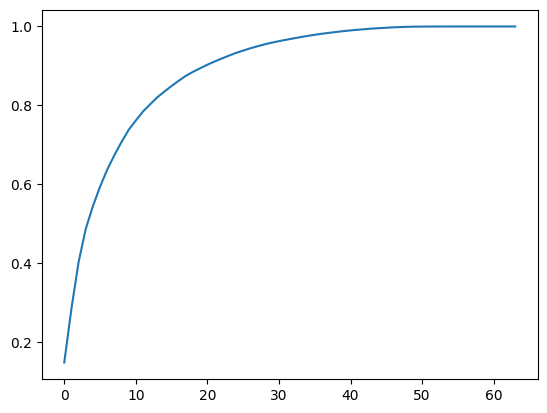

In [2]:
digits = datasets.load_digits()  # 8x8 크기의 손글씨 숫자 데이터 로드
# 특성 행렬을 표준화 처리
features = StandardScaler().fit_transform(digits.data)
# 99% 의 분산을 유지하도록 PCA 클래스 객체 생성
pca = PCA(n_components=0.99, whiten=True)
features_pca = pca.fit_transform(features)
print("원본 특성 개수 : ", features.shape[1])
print("줄어든 특성 개수 : ", features_pca.shape[1])

# # 주성분에 투영된 처음 두 개의 특성을 사용해 산점도 출력
# plt.scatter(features_pca[:, 0], features_pca[:, 1])
# plt.show()

# 화이트닝
pca_nowhiten = PCA(n_components=0.99)
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:, 0], features_nowhiten[:, 1])
plt.show()

# 특성 행렬을 주성분에 투영하려면 components_ 배열 전치하여 행렬곱을 수행합니다.
# 넘파이 allclose()를 사용하여 features_nowhiten 배열과 동일한지 확인
np.allclose(features_nowhiten, np.dot(features, pca_nowhiten.components_.T))

pca = PCA(whiten=True).fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()


# 넘파이 cumsum()를 사용하여 분산을 누적하여 그래프 출력
# 대략 30개의 주성분으로도 80이상의 분산을 유지
# 표준화하지 않은 원본 데이터 사용
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()